In [5]:
import pandas as pd

In [6]:
import sklearn

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [13]:
from sklearn.model_selection import train_test_split

In [8]:
import seaborn as sns
%matplotlib inline

In [9]:
df=pd.read_csv(r'C:\Users\ayesha.amjad\Desktop\Data Science for starters _ python scripts\datasets\Advertising.csv')
print(df.shape)

(200, 5)


In [6]:
print(df.columns)

Index(['S_No', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [7]:
X2=df.drop(columns=['S_No'])

In [21]:
corr_df=X2.corr()
corr_df

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


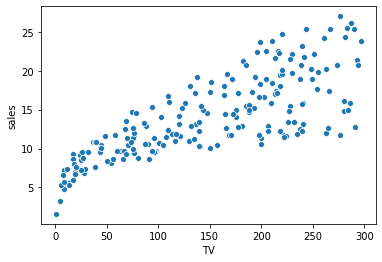

In [12]:
sns.scatterplot(data=df, x="TV", y="sales")

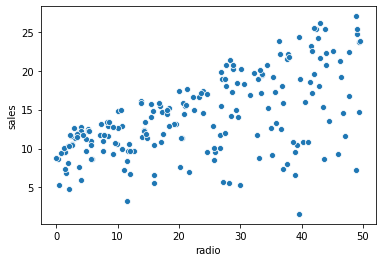

In [13]:
sns.scatterplot(data=df, x="radio", y="sales")

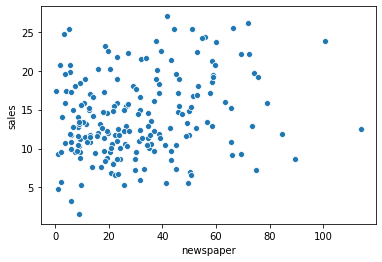

In [14]:
sns.scatterplot(data=df, x="newspaper", y="sales")

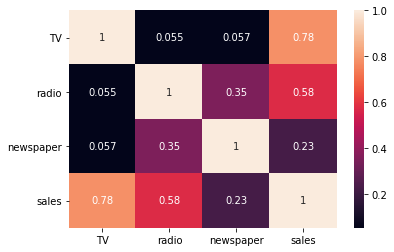

In [25]:
sns.heatmap(corr_df, annot=True)

In [27]:
y = df[['sales']]
X = df[['TV', 'radio', 'newspaper']]
X = sm.add_constant(X)
mod = sm.OLS(y,X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 13 Feb 2023   Prob (F-statistic):           1.58e-96
Time:                        21:16:12   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

C:\Users\ayesha.amjad\AppData\Roaming\Python\Python37\site-packages\numpy\core\fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [10]:
y = df[['sales']]
X = df[['TV', 'radio', 'newspaper']]
reg=LinearRegression().fit(X,y)
print(reg.score(X,y))
print(reg.coef_)
print(reg.intercept_)

0.8972106381789521
[[ 0.04576465  0.18853002 -0.00103749]]
[2.93888937]


In [11]:
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

Mean squared error: 2.78
Coefficient of determination: 0.897


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
reg2=LinearRegression().fit(X_train, y_train)
print(reg2.score(X_train,y_train))
print(reg2.coef_)
print(reg2.intercept_)
y_pred_test = reg2.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

0.9833547582993248
[[ 4.73762392e-02 -1.58732320e-03  1.26172971e-03 -1.03487200e-04
   5.13213267e-04 -1.11681811e-08]]
[5.53610605]
Mean squared error: 0.28
Coefficient of determination: 0.991


In [29]:
X = df[['TV','radio']]
X['TV_Radio'] = df['TV']*df['radio']
print(X.shape)
X.head()

(200, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TV,radio,TV_Radio
0,230.1,37.8,8697.78
1,44.5,39.3,1748.85
2,17.2,45.9,789.48
3,151.5,41.3,6256.95
4,180.8,10.8,1952.64


In [30]:
y = df[['sales']]
reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
y_pred = reg.predict(X)
print("Mean squared error: %.2f" % mean_squared_error(y, y_pred))
print("Coefficient of determination: %.3f" % r2_score(y, y_pred))

0.9677905498482523
[[0.01910107 0.02886034 0.00108649]]
[6.7502202]
Mean squared error: 0.87
Coefficient of determination: 0.968


In [36]:
X['TV_sq'] = df['TV']*df['TV']
X['radio_sq'] = df['radio']*df['radio']
X['TV_radio_sq'] = df['TV']*df['TV']*df['radio']*df['radio']

In [35]:
X.head()

,TV,radio,TV_Radio,TV_sq,radio_sq
0,230.1,37.8,8697.78,52946.01,1428.84
1,44.5,39.3,1748.85,1980.25,1544.49
2,17.2,45.9,789.48,295.84,2106.81
3,151.5,41.3,6256.95,22952.25,1705.69
4,180.8,10.8,1952.64,32688.64,116.64


In [53]:
y = df[['sales']]
reg3 = LinearRegression().fit(X_train, y_train)
print(reg3.score(X_train,y_train))
print(reg3.coef_)
print(reg3.intercept_)
y_pred = reg3.predict(X_test)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred_test))
print("Coefficient of determination: %.3f" % r2_score(y_test, y_pred_test))

0.9833547582993248
[[ 4.73762392e-02 -1.58732320e-03  1.26172971e-03 -1.03487200e-04
   5.13213267e-04 -1.11681811e-08]]
[5.53610605]
Mean squared error: 0.28
Coefficient of determination: 0.991
